# Installation, Importing Dependencies

In [ ]:
%pip3 install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
%cd yolov5
%pip install -r "requirements.txt"

In [1]:
import torch    # load yolo model, detect objects
from matplotlib import pyplot as plt    # for visualizing images
import numpy as np    # array transformation
import cv2    # help access webcam and render feeds

/opt/homebrew/Caskroom/miniforge/base/envs/pt_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/hssarah/.cache/torch/hub/ultralytics_yolov5_master
/opt/homebrew/Caskroom/miniforge/base/envs/pt_env/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
YOLOv5 🚀 2022-4-19 torch 1.10.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Image Detection

In [14]:
# img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
img = ['dataset/traffic.jpg']

In [15]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 10.7ms pre-process, 98.2ms inference, 8.4ms NMS per image at shape (1, 3, 448, 640)


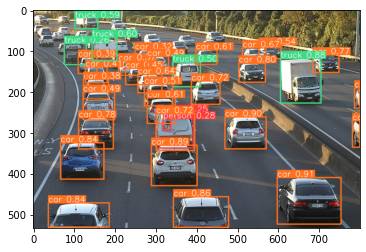

In [16]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [17]:
np.array(results.render()).shape

(1, 533, 800, 3)

In [18]:
results.render()
# This is just array representation of the image 
# To actually render it, we have to pass it through to a rendering function

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# Real Time Detection(실시간 객체 탐지)

In [ ]:
cap = cv2.VideoCapture(0)   # accessing webcam (Video Capture Device 0)
while cap.isOpened():       # Capture Device가 열려있는지 확인
    ret, frame = cap.read() # Capture Device에서 읽어오기 (return value, frame)

    cv2.imshow('YOLO', frame)
    if cv2.waitKey(10) & 0xEF == ord('q'):  # exit
       break
cap.release()               # realise webcam
cv2.destroyAllWindows

# 여기까진 탐지X, 그냥 실시간 피드에 접근하는 거임(just accessing real-time feed)

In [ ]:
cap = cv2.VideoCapture(0)   
while cap.isOpened():       
    ret, frame = cap.read() 

    # Make Detections - pass throught the frame from webcam to yolo model
    results = model(frame)

    # cv2.imshow to show the results - wrap results.render() inside of numpy func to squeeze it
    cv2.imshow('YOLO', np.squeeze(results.render()))
    # results.render()는 그냥 이 이미지의 array representation이므로 
    # 실제로 이를 render 하려면 cv2.imshow같은 rendering function에 넣어줘야함. 그 과정에서 그 큰 배열에서 squeeze 하는 것.



    if cv2.waitKey(10) & 0xEF == ord('q'):  
        break
cap.release() 
cv2.destroyAllWindows


In [ ]:
# 동영상에서 탐지하려면 여기 0 대신 VideoCapture에 이렇게 example.mp4 넣어주면 됨
cap = cv2.VideoCapture('example.mp4')   
while cap.isOpened():       
    ret, frame = cap.read() 

    # Make Detections - pass throught the frame from webcam to yolo model
    results = model(frame)

    # cv2.imshow to show the results - wrap results.render() inside of numpy func to squeeze it
    cv2.imshow('YOLO', np.squeeze(results.render()))
    # results.render()는 그냥 이 이미지의 array representation이므로 
    # 실제로 이를 render 하려면 cv2.imshow같은 rendering function에 넣어줘야함. 그 과정에서 그 큰 배열에서 squeeze 하는 것.



    if cv2.waitKey(10) & 0xEF == ord('q'):  
        break
cap.release() 
cv2.destroyAllWindows